In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8580246913580247, Loss: 0.671529628612377
Checkpoint 20, Accuracy: 0.8641975308641975, Loss: 0.6473277763084129
Checkpoint 30, Accuracy: 0.8827160493827161, Loss: 0.6066149958857784
Checkpoint 40, Accuracy: 0.8888888888888888, Loss: 0.6042363202130353
Checkpoint 50, Accuracy: 0.8888888888888888, Loss: 0.4997529983520508
Checkpoint 60, Accuracy: 0.9012345679012346, Loss: 0.45963050701000074
Checkpoint 70, Accuracy: 0.9259259259259259, Loss: 0.4265931800559715
Checkpoint 80, Accuracy: 0.9320987654320988, Loss: 0.3728950994986075
Checkpoint 90, Accuracy: 0.9320987654320988, Loss: 0.3222310454757125
Checkpoint 100, Accuracy: 0.9567901234567902, Loss: 0.31098817895959924
Checkpoint 110, Accuracy: 0.9567901234567902, Loss: 0.27425532870822483
Checkpoint 120, Accuracy: 0.9629629629629629, Loss: 0.24278739646629052
Checkpoint 130, Accuracy: 0.9629629629629629, Loss: 0.21037433765552663
Checkpoint 140, Accuracy: 0.9629629629629629, Loss: 0.18634200979162147
Checkpoint

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

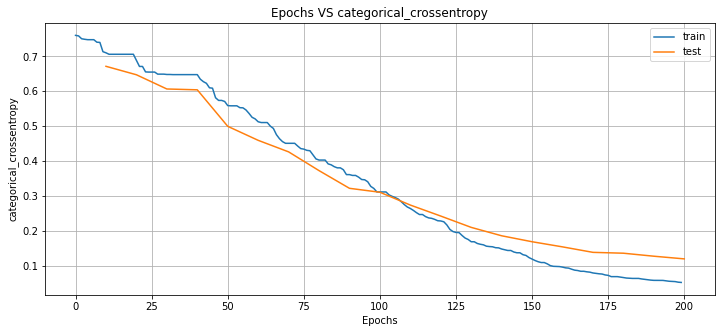

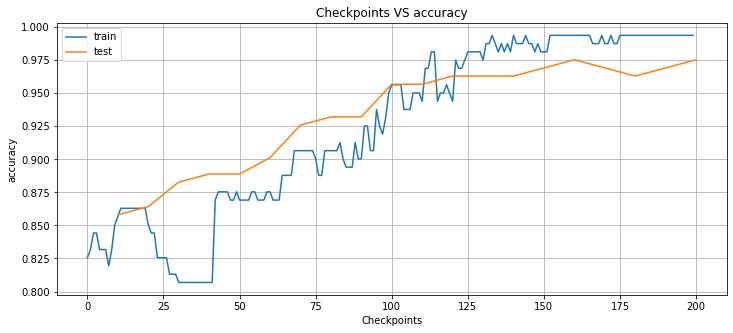

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 1. 0.] <-> [2.9371369e-01 7.0620364e-01 8.2658487e-05]
[1. 0. 0.] <-> [0.965714   0.00421254 0.03007345]
[1. 0. 0.] <-> [0.99023634 0.00853075 0.0012329 ]
[1. 0. 0.] <-> [0.98951435 0.00210753 0.00837801]
[1. 0. 0.] <-> [0.8813702  0.00347623 0.11515357]
[0. 1. 0.] <-> [5.4039266e-02 9.4595152e-01 9.2992741e-06]
[0. 0. 1.] <-> [1.9023668e-02 2.8483750e-04 9.8069155e-01]
[1. 0. 0.] <-> [0.98704565 0.00313339 0.00982089]
[1. 0. 0.] <-> [0.9933462  0.00460716 0.00204662]
[1. 0. 0.] <-> [0.9907753  0.00764883 0.0015759 ]
[0. 0. 1.] <-> [1.5294281e-02 2.3792026e-04 9.8446780e-01]
[1. 0. 0.] <-> [0.9870661  0.01140854 0.00152527]
[0. 0. 1.] <-> [1.5333776e-02 2.3833435e-04 9.8442787e-01]
[1. 0. 0.] <-> [0.8166152  0.00404138 0.17934333]
[1. 0. 0.] <-> [0.98421973 0.0025612  0.01321913]
[1. 0. 0.] <-> [0.98934174 0.00500752 0.00565071]
[1. 0. 0.] <-> [0.9738371  0.0040912  0.02207178]
[1. 0. 0.] <-> [0.9920725  0.00206872 0.00585875]
[1. 0. 0.] <-> [0.98837346 0.00953255 0.00209394]
[0. 1

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8580246913580247, 'mean_square_error': 0.40373171645464445, 'categorical_crossentropy': 0.671529628612377, 'essential_metrics': {0: {'tp_hit': 74, 'fp_hit': 17, 'tn_hit': 11, 'fn_hit': 6}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 15}, 2: {'tp_hit': 11, 'fp_hit': 6, 'tn_hit': 89, 'fn_hit': 2}}, 'checkpoint': 10} 


{'accuracy': 0.8641975308641975, 'mean_square_error': 0.3836475881203678, 'categorical_crossentropy': 0.6473277763084129, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 18, 'tn_hit': 10, 'fn_hit': 4}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 15}, 2: {'tp_hit': 10, 'fp_hit': 4, 'tn_hit': 91, 'fn_hit': 3}}, 'checkpoint': 20} 


{'accuracy': 0.8827160493827161, 'mean_square_error': 0.33800867911485966, 'categorical_crossentropy': 0.6066149958857784, 'essential_metrics': {0: {'tp_hit': 79, 'fp_hit': 18, 'tn_hit': 10, 'fn_hit': 1}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 15}, 2: {'tp_hit': 10, 'fp_hit': 1, 'tn_hit': 94, 'fn

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[-0.75229126  2.4203482   1.9342463  -3.         -3.        ]
 bias: 2.452742099761963

Neuron 1: weights:
[-0.7767483 -1.2585427  0.5515151  2.8426626  2.2627387]
 bias: 0.08821392804384232

Neuron 2: weights:
[-1.1700411  2.7704294  3.        -1.5706187 -3.       ]
 bias: -3.0

Neuron 3: weights:
[ 1.7674589  -3.         -0.4856457   0.13152686  1.3831826 ]
 bias: 2.43560791015625

$
Layer 2
Neuron 0: weights:
[ 3.        -3.        -3.         0.7476402]
 bias: 2.2167954444885254

Neuron 1: weights:
[ 2.4240525 -1.1812453  3.        -3.       ]
 bias: -0.01762312836945057

Neuron 2: weights:
[-3.         1.8748199 -3.         3.       ]
 bias: -0.7457484602928162

$

